In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#loading the 2005 data for station PTIM4
df = pd.read_table('/Users/vineethjason/Documents/University_of_Michigan/Winter_2020/EAS_639_006/PythonB/pythonB_assignments/weatherData/PTIM4/ptim4h2005.txt', delim_whitespace=True, names=("YYYY","MM","DD","hh","mm","WD","WSPD","GST","WVHT","DPD","APD","MWD","BAR","ATMP","WTMP","DEWP","VIS","TIDE"), low_memory=False)
# create a new column to represent the datetime
df["dateTime"] = df["YYYY"].astype(str) + df["MM"].astype(str) + df["DD"].astype(str) + df["hh"].astype(str) + df["mm"].astype(str)
#removing the original header which was not iterable
df = df.loc[1:, :]
df.head()

,YYYY,MM,DD,hh,mm,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,TIDE,dateTime
1,2005,01,01,00,06,264,11.4,14.6,99.00,99.00,99.00,999,1012.2,0.1,999.0,999.0,99.0,99.00,200501010006
2,2005,01,01,00,18,276,10.3,12.0,99.00,99.00,99.00,999,1012.7,-0.5,999.0,999.0,99.0,99.00,200501010018
3,2005,01,01,00,24,273,9.7,11.9,99.00,99.00,99.00,999,1013.1,-0.8,999.0,999.0,99.0,99.00,200501010024
4,2005,01,01,00,30,276,8.7,13.6,99.00,99.00,99.00,999,1013.3,-0.7,999.0,999.0,99.0,99.00,200501010030
5,2005,01,01,00,36,283,10.3,12.4,99.00,99.00,99.00,999,1013.5,-0.4,999.0,999.0,99.0,99.00,200501010036


In [4]:
# convert the datetime to a list
dfList = df['dateTime'].tolist()
# create a new empty list to hold true datetime values
dateList = []
# run datetime function
for d in dfList:
    dates = datetime.strptime(d, '%Y%m%d%H%M')
    dateList.append(dates)

#a = ["YYYYMMDDhhmm"]
#dateListnew = a + dateList
# add the list as a new column to the dataframe
df["dateTimeTrue"] = dateList
df.head()

,YYYY,MM,DD,hh,mm,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,TIDE,dateTime,dateTimeTrue
1,2005,01,01,00,06,264,11.4,14.6,99.00,99.00,99.00,999,1012.2,0.1,999.0,999.0,99.0,99.00,200501010006,2005-01-01 00:06:00
2,2005,01,01,00,18,276,10.3,12.0,99.00,99.00,99.00,999,1012.7,-0.5,999.0,999.0,99.0,99.00,200501010018,2005-01-01 00:18:00
3,2005,01,01,00,24,273,9.7,11.9,99.00,99.00,99.00,999,1013.1,-0.8,999.0,999.0,99.0,99.00,200501010024,2005-01-01 00:24:00
4,2005,01,01,00,30,276,8.7,13.6,99.00,99.00,99.00,999,1013.3,-0.7,999.0,999.0,99.0,99.00,200501010030,2005-01-01 00:30:00
5,2005,01,01,00,36,283,10.3,12.4,99.00,99.00,99.00,999,1013.5,-0.4,999.0,999.0,99.0,99.00,200501010036,2005-01-01 00:36:00


In [5]:
## TEST ##
# convert the temp from string to float
df['ATMP'] = df['ATMP'].astype(float)
#print(type(df['ATMP'][1]))

# create a new dataframe to include only Temp and true Datetime
dfNew = df.loc[:, ["dateTimeTrue", "ATMP"]]
print(dfNew.describe())
#print(type(df[["ATMP"][1:]]))

#df["ATMP"].max() [= 999.0]
## max is 999.000 (supposed to be NaN but NOAA website uses all 9's to indicate missing data)

               ATMP
count  33223.000000
mean      50.274722
std      214.429455
min      -27.500000
25%       -5.500000
50%        2.500000
75%       11.800000
max      999.000000


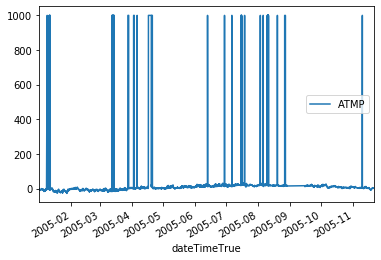

In [20]:
dfNew.plot(kind='line',x='dateTimeTrue',y='ATMP')